In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv


In [12]:
# create a path
path = '/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv'

# Read data
df = pd.read_csv(path)

# Show the five first rows
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [13]:
# Info about the dataset
df.info

<bound method DataFrame.info of                                    MOVIES         YEAR  \
0                           Blood Red Sky       (2021)   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves       (2021)   
...                                   ...          ...   
9994                       The Imperfects     (2021– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           GENRE  RATING  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, C

In [14]:
# Check for null values and count
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [15]:
# Percentagem null values
percentagem = df.isnull().mean() * 100
print(percentagem)

MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64


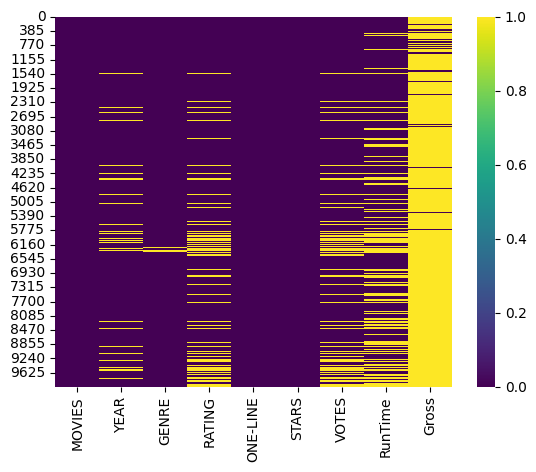

In [16]:
# Visualize null values with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar='False', cmap='viridis')
plt.show()

In [17]:
#  I will delete Columns with more than 80% of null values. 

# List of column before cleaning
column_before = df.columns.tolist()

# Drop columns with more than 80% of null values
df = df.dropna(thresh= 0.80 * len(df), axis=1)

# List of columns after cleaning
column_after = df.columns.tolist()

# Total dropped column
total_dropped = set(column_before) - set(column_after)
print(f'Dropped columns:{total_dropped}')


Dropped columns:{'Gross', 'RunTime'}


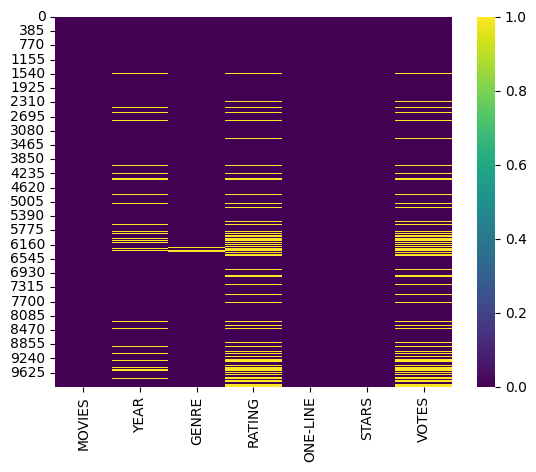

In [20]:
# HeatMap after cleaning
sns.heatmap(df.isnull(), cbar='False', cmap= 'viridis')
plt.show()

In [24]:
#Column with null values
print(df['YEAR'])
print([df['RATING'][0: 10]])
print(df['VOTES'][0: 10])

0            (2021)
1          (2021– )
2       (2010–2022)
3          (2013– )
4            (2021)
           ...     
9994       (2021– )
9995       (2021– )
9996       (2022– )
9997       (2021– )
9998       (2021– )
Name: YEAR, Length: 9999, dtype: object
[0    6.1
1    5.0
2    8.2
3    9.2
4    NaN
5    7.6
6    6.8
7    8.6
8    7.9
9    7.4
Name: RATING, dtype: float64]
0     21,062
1     17,870
2    885,805
3    414,849
4        NaN
5     25,858
6      5,283
7    665,387
8     34,530
9     27,279
Name: VOTES, dtype: object


In [25]:
# These values are not values i can replace, so I will just delete. 
# Remove rows with null values
df.dropna(inplace=True)

/tmp/ipykernel_47/4191530181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [26]:
df.isnull()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9960,False,False,False,False,False,False,False
9961,False,False,False,False,False,False,False
9962,False,False,False,False,False,False,False
9963,False,False,False,False,False,False,False


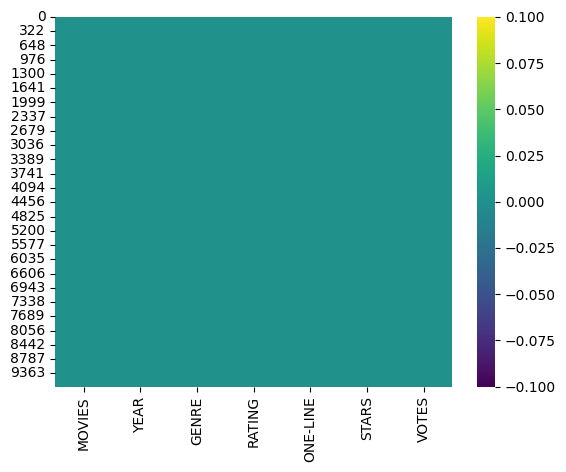

In [27]:
#Show null values in heatmap
sns.heatmap(df.isnull(), cbar='False', cmap='viridis')
plt.show()

In [61]:
#Drop duplicate values
df.drop_duplicates()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES
0,Blood Red Sky,NaN,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062"
1,Masters of the Universe: Revelation,NaN,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870"
2,The Walking Dead,NaN,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805"
3,Rick and Morty,NaN,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849"
5,Outer Banks,NaN,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858"
...,...,...,...,...,...,...,...
9960,Sexify,NaN,"\nComedy, Drama",7.1,\nAfter facing their parents at Easter breakfa...,\n Director:\nKalina Alabrudzinska\n| \n ...,103
9961,Sexify,NaN,"\nComedy, Drama",6.9,\nAfter getting an anonymous tip about the cop...,\n Director:\nKalina Alabrudzinska\n| \n ...,96
9962,Sexify,NaN,"\nComedy, Drama",7.1,\nThe big pitch at the university tech competi...,\n Director:\nKalina Alabrudzinska\n| \n ...,100
9963,Castlevania,NaN,"\nAnimation, Action, Adventure",8.2,\nLenore urges Hector to not test Camilla's pa...,\n Director:\nSam Deats\n| \n Stars:\nRi...,911
